In [1]:
import random
import h3
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

# Define the range for ELAPSETIME
start = 0
stop = 500

# Define the bounding box for Boulder, CO
minx, miny = -105.301758, 39.964069
maxx, maxy = -105.178925, 40.094555

# Generate a list of random lat-long points within the bounding box
points = [Point(random.uniform(minx, maxx), random.uniform(miny, maxy)) for _ in np.arange(10000)]

# Create a geodataframe with the specified columns and attributes
gdf = gpd.GeoDataFrame({'ELAPSETIME': [random.randint(start, stop) for _ in np.arange(10000)],
                        'geometry': points}, crs='EPSG:4326')

In [3]:


# x = longitude, y = latitude!!!
res = 10
col = f"H3_{res}"
gdf[col] = gdf.apply(lambda row: str(h3.latlng_to_cell(row.geometry.y, row.geometry.x, res)), axis=1)

In [4]:
h3_df = gdf.groupby(col)['ELAPSETIME'].describe().reset_index()


In [5]:
from shapely.geometry import Polygon

def cell_to_shapely(cell):
    coords = h3.cell_to_boundary(cell)
    flipped = tuple(coord[::-1] for coord in coords)
    return Polygon(flipped)

In [6]:
h3_geoms = h3_df[col].apply(lambda x: cell_to_shapely(x))
h3_gdf = gpd.GeoDataFrame(data=h3_df, geometry=h3_geoms, crs=4326)

<Axes: >

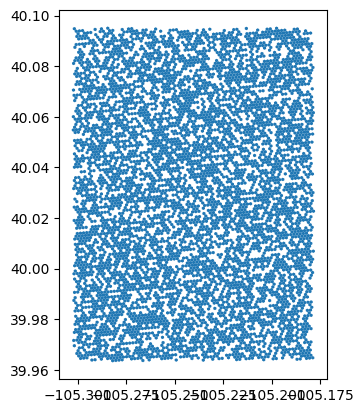

In [7]:
h3_gdf.plot()